### Import libraries and datasets

In [10]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
df = pd.read_excel('PIK3CA.xlsx')  # contains smiles and corresponding ic50 values

In [15]:
rdkit_df = pd.read_excel('PIK3CA_descriptors.xlsx') # contains rdkit descriptors for each compounds

In [16]:
df.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,pIC50,IC50,standard_units
0,0,CHEMBL435507,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,5.619789,2400.0,nM
1,1,CHEMBL98350,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,5.638272,2300.0,nM
2,2,CHEMBL104468,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,4.886057,13000.0,nM
3,3,CHEMBL188678,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,5.301030,5000.0,nM
4,4,CHEMBL379156,O=C1NC(=O)/C(=C/c2ccc(-c3ccc(F)cc3O)o2)S1,6.026872,940.0,nM


### RDKit Results

In [17]:
rdkit_df.head()

,Unnamed: 0,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,13.300824,13.300824,0.373221,-3.873970,0.646725,295.338,278.202,295.120843,112,...,0,0,0,0,0,0,0,0,0,0
1,1,13.362025,13.362025,0.305310,-3.665314,0.728379,307.349,290.213,307.120843,116,...,0,0,0,0,0,0,0,0,0,0
2,2,13.168156,13.168156,0.247596,-3.587512,0.643252,281.311,266.191,281.105193,106,...,0,0,0,0,0,0,0,0,0,0
3,3,13.774156,13.774156,0.116155,-3.706189,0.374251,413.498,394.346,413.108564,148,...,0,0,0,0,0,0,0,1,0,0
4,4,13.864007,13.864007,0.010190,-1.434530,0.833356,305.286,297.222,305.015807,106,...,1,0,0,0,0,0,0,0,0,0


In [18]:
rdkit_df = rdkit_df.drop(rdkit_df.columns[0], axis=1)

In [19]:
rdkit_df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.300824,13.300824,0.373221,-3.873970,0.646725,295.338,278.202,295.120843,112,0,...,0,0,0,0,0,0,0,0,0,0
1,13.362025,13.362025,0.305310,-3.665314,0.728379,307.349,290.213,307.120843,116,0,...,0,0,0,0,0,0,0,0,0,0
2,13.168156,13.168156,0.247596,-3.587512,0.643252,281.311,266.191,281.105193,106,0,...,0,0,0,0,0,0,0,0,0,0
3,13.774156,13.774156,0.116155,-3.706189,0.374251,413.498,394.346,413.108564,148,0,...,0,0,0,0,0,0,0,1,0,0
4,13.864007,13.864007,0.010190,-1.434530,0.833356,305.286,297.222,305.015807,106,0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
len(rdkit_df)

4790

In [21]:
rdkit_df['pic50'] = df['pIC50']

In [22]:
rdkit_df.columns

Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'pic50'],
      dtype='object', length=210)

In [23]:
rdkit2 = rdkit_df.dropna(axis=0)
len(rdkit2) # no nan values

4790

In [24]:
rdkit2 = rdkit2.reset_index()

In [25]:
y = rdkit2['pic50']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4790 entries, 0 to 4789
Series name: pic50
Non-Null Count  Dtype  
--------------  -----  
4790 non-null   float64
dtypes: float64(1)
memory usage: 37.5 KB


In [26]:
X = rdkit2.drop(columns=['pic50'])  
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Columns: 210 entries, index to fr_urea
dtypes: float64(103), int64(107)
memory usage: 7.7 MB


In [27]:
rdkit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Columns: 211 entries, index to pic50
dtypes: float64(104), int64(107)
memory usage: 7.7 MB


#### Feature Selection

In [30]:
X.head()

,index,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,13.300824,13.300824,0.373221,-3.873970,0.646725,295.338,278.202,295.120843,112,...,0,0,0,0,0,0,0,0,0,0
1,1,13.362025,13.362025,0.305310,-3.665314,0.728379,307.349,290.213,307.120843,116,...,0,0,0,0,0,0,0,0,0,0
2,2,13.168156,13.168156,0.247596,-3.587512,0.643252,281.311,266.191,281.105193,106,...,0,0,0,0,0,0,0,0,0,0
3,3,13.774156,13.774156,0.116155,-3.706189,0.374251,413.498,394.346,413.108564,148,...,0,0,0,0,0,0,0,1,0,0
4,4,13.864007,13.864007,0.010190,-1.434530,0.833356,305.286,297.222,305.015807,106,...,1,0,0,0,0,0,0,0,0,0


In [31]:
def remove_low_variance(input_data, threshold):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

In [32]:
X = remove_low_variance(X, 0.1)

In [33]:
X.info() # 136 columns are remaining only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Columns: 136 entries, index to fr_urea
dtypes: float64(86), int64(50)
memory usage: 5.0 MB


In [34]:
X = X.drop(columns=['index'])

In [35]:
X.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinEStateIndex,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,BCUT2D_MWHI,BCUT2D_MRHI,AvgIpc,...,fr_methoxy,fr_morpholine,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_pyridine,fr_sulfonamd,fr_urea
0,13.300824,13.300824,-3.873970,295.338,278.202,295.120843,112,10.979681,2.200031,2.787313,...,0,1,0,0,0,0,0,0,0,0
1,13.362025,13.362025,-3.665314,307.349,290.213,307.120843,116,11.189384,2.361025,2.828198,...,0,1,1,0,0,0,0,0,0,0
2,13.168156,13.168156,-3.587512,281.311,266.191,281.105193,106,11.187540,2.539105,2.738738,...,0,1,0,0,0,0,0,0,0,0
3,13.774156,13.774156,-3.706189,413.498,394.346,413.108564,148,11.396446,3.007416,3.395367,...,0,1,1,0,0,0,0,0,0,0
4,13.864007,13.864007,-1.434530,305.286,297.222,305.015807,106,13.497274,3.922063,3.128469,...,0,0,0,1,1,0,0,0,0,0


In [49]:
X_cols = X.columns.to_list()

In [51]:
X_cols_df = pd.DataFrame(X_cols, columns=['Columns'])


In [53]:
X_cols_df.to_excel('X_cols_list.xlsx')

#### Lazy Predict

In [36]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [37]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 38%|███▊      | 16/42 [01:00<01:30,  3.50s/it]

KernelRidge model failed to execute
solve() got an unexpected keyword argument 'sym_pos'


 86%|████████▌ | 36/42 [1:10:16<29:15, 292.62s/it]  

Ridge model failed to execute
solve() got an unexpected keyword argument 'sym_pos'


 98%|█████████▊| 41/42 [1:10:25<01:32, 92.73s/it] 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16856
[LightGBM] [Info] Number of data points in the train set: 3832, number of used features: 135
[LightGBM] [Info] Start training from score 6.795915


100%|██████████| 42/42 [1:10:30<00:00, 100.72s/it]


In [40]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.66,0.71,0.64,9.76
HistGradientBoostingRegressor,0.64,0.69,0.65,13.27
LGBMRegressor,0.64,0.69,0.66,4.32
SVR,0.64,0.69,0.66,2.23
NuSVR,0.63,0.68,0.67,1.79
KNeighborsRegressor,0.62,0.68,0.67,0.15
RandomForestRegressor,0.62,0.68,0.67,18.40
XGBRegressor,0.61,0.66,0.68,6.49
BaggingRegressor,0.58,0.64,0.70,2.25


##### Run the top model with hyperparameter tuning e.g. ExtraTreesRegressor

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error

In [42]:
param_grid = {
    'max_depth': [None, 3, 5, 10, 15, 20],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

extra_tree_regressor = ExtraTreesRegressor(random_state=50)

In [43]:
grid_search = GridSearchCV(extra_tree_regressor, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesRegressor(random_state=50), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [44]:
best_et = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_et)
print(best_model)

{'max_depth': 20, 'n_estimators': 250}
ExtraTreesRegressor(max_depth=20, n_estimators=250, random_state=50)


In [45]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [46]:
# Calculate R-squared (R2) for both train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Squared Error (MSE) for both train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE) for both train and test data
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE) for both train and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("R-squared (R2) - Train:", r2_train)
print("R-squared (R2) - Test:", r2_test)
print("Mean Squared Error (MSE) - Train:", mse_train)
print("Mean Squared Error (MSE) - Test:", mse_test)
print("Root Mean Squared Error (RMSE) - Train:", rmse_train)
print("Root Mean Squared Error (RMSE) - Test:", rmse_test)
print("Mean Absolute Error (MAE) - Train:", mae_train)
print("Mean Absolute Error (MAE) - Test:", mae_test)

R-squared (R2) - Train: 0.995920263233066
R-squared (R2) - Test: 0.7028205752087363
Mean Squared Error (MSE) - Train: 0.005373020133736186
Mean Squared Error (MSE) - Test: 0.4110999450464596
Root Mean Squared Error (RMSE) - Train: 0.07330088767358951
Root Mean Squared Error (RMSE) - Test: 0.6411707612223592
Mean Absolute Error (MAE) - Train: 0.039059824661011926
Mean Absolute Error (MAE) - Test: 0.46170550039282243


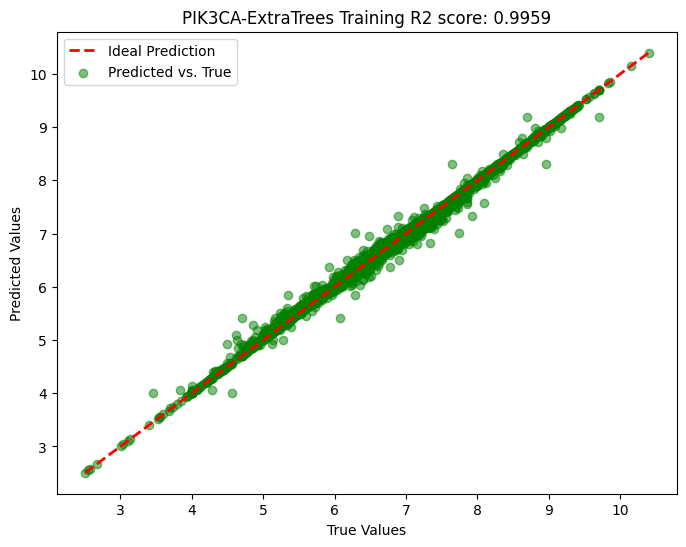

In [47]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2, c='red', label='Ideal Prediction')

plt.scatter(y_train, y_train_pred, c='green', label='Predicted vs. True', alpha=0.5)

# Add a title
plt.title(f'PIK3CA-ExtraTrees Training R2 score: {r2_train:.4f}')

# Add a legend
plt.legend()

# Save the plot to a file (e.g., PNG format)
plt.savefig('PIK3CA_ExtraTrees_training.png')

# Show the plot
plt.show()

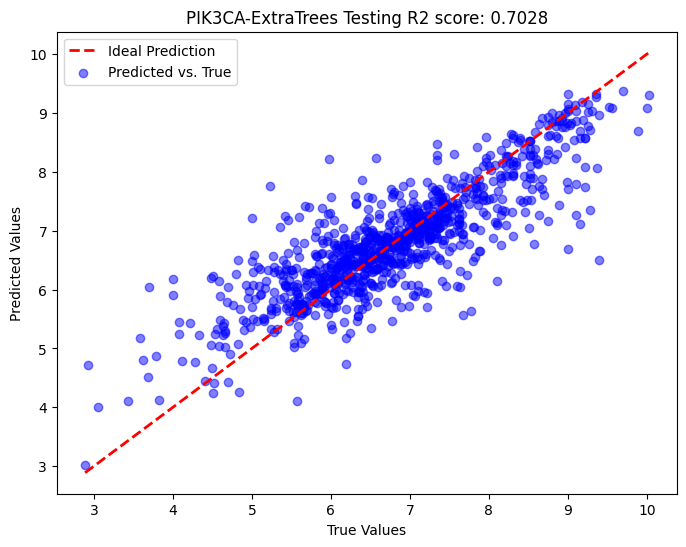

In [61]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Add labels and a diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, c='red', label='Ideal Prediction')

plt.scatter(y_test, y_test_pred, c='blue', label='Predicted vs. True', alpha=0.5)

# Add a title
plt.title(f'PIK3CA-ExtraTrees Testing R2 score: {r2_test:.4f}')

# Add a legend
plt.legend()

# Save the plot to a file (e.g., PNG format)
plt.savefig('PIK3CA-ExtraTrees_testing.png')

# Show the plot
plt.show()

In [54]:
# save the model

import joblib

joblib.dump(best_model, 'PIK3CA_model.joblib')

['PIK3CA_model.joblib']